In [2]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
#Filter for US jobs only    
df_usa_jobs = df[df['job_country'] == 'United States'].copy()

In [4]:
#Get job posted month   
df_usa_jobs['job_posted_month'] = df_usa_jobs['job_posted_date'].dt.strftime('%b')
#verify the data 
df_usa_jobs.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",Nov
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",Mar
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",Apr


In [5]:
unique_months = df_usa_jobs['job_posted_month'].unique()


In [6]:
unique_months

array(['Jun', 'Jul', 'Nov', 'Mar', 'Apr', 'Sep', 'Feb', 'Jan', 'Aug',
       'Dec', 'Oct', 'May'], dtype=object)

In [7]:
#store each month  data in a dictionary
month_data = {month : df_usa_jobs[df_usa_jobs['job_posted_month'] == month] for month in unique_months}


In [8]:
us_jobs_first_q = pd.concat([month_data['Jan'], month_data['Feb'], month_data['Mar']], ignore_index=True)

<Axes: xlabel='job_posted_month'>

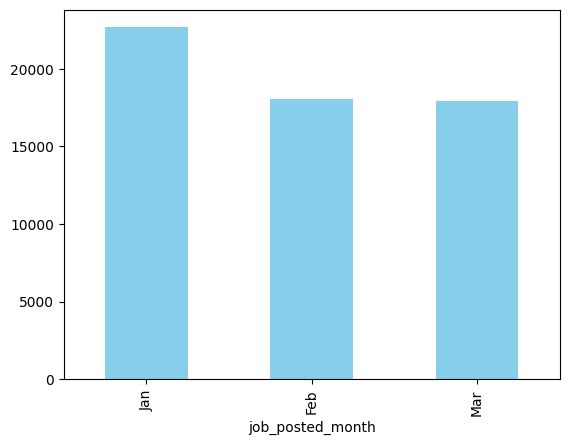

In [12]:
us_jobs_first_q['job_posted_month'].value_counts().plot(kind='bar', color='skyblue')